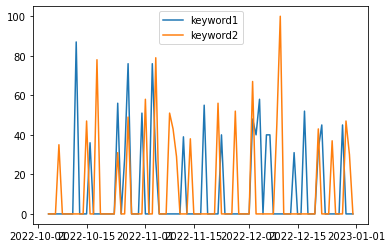

            keyword1  keyword2  isPartial
date                                     
2022-10-04         0         0      False
2022-10-05         0         0      False
2022-10-06         0         0      False
2022-10-07         0        35      False
2022-10-08         0         0      False
...              ...       ...        ...
2022-12-27         0         0      False
2022-12-28        45         0      False
2022-12-29         0        47      False
2022-12-30         0        30      False
2022-12-31         0         0      False

[89 rows x 3 columns]


In [8]:
from flask import Flask, render_template
import requests
from pytrends.request import TrendReq

#Create an instance of the TrendReq class and use the build_payload method to specify the keywords and time frame for your request
pytrends = TrendReq()

kw_list = ['keyword1', 'keyword2']
timeframe = 'today 3-m'

pytrends.build_payload(kw_list=kw_list, timeframe=timeframe)
#interest_over_time method to get the trend data for the specified keywords:
trend_data = pytrends.interest_over_time()

import matplotlib.pyplot as plt

trend_data = pytrends.interest_over_time()

plt.plot(trend_data['keyword1'], label='keyword1')
plt.plot(trend_data['keyword2'], label='keyword2')
plt.legend()
plt.show()
print(trend_data)

In [10]:
import time
import collections
from collections import Counter

def count_words_dict(text):
    word_counts = {}
    for word in text.split():
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    return word_counts

def count_words_counter(text):
    return collections.Counter(text.split())

# Read the text file into a string
with open("t8.shakespeare.txt", "r") as f:
    text = f.read()

# Create lists to store the execution times for each function
times1 = []
times2 = []

# Call the decorated functions multiple times and record the execution times
for i in range(100):
    start = time.perf_counter()
    count_words_dict(text)
    end = time.perf_counter()
    times1.append(end - start)

    start = time.perf_counter()
    count_words_counter(text)
    end = time.perf_counter()
    times2.append(end - start)

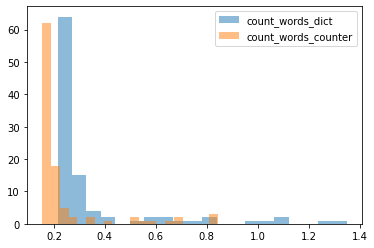

In [11]:
import matplotlib.pyplot as plt

# Create a histogram of the execution times for each function
plt.hist(times1, bins=20, alpha=0.5, label="count_words_dict")
plt.hist(times2, bins=20, alpha=0.5, label="count_words_counter")
plt.legend(loc="upper right")
plt.savefig("count_word_dict_and_counter.png", facecolor="w", edgecolor="w")
plt.show()
